In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")


# Loading the data
# Dataframe
path_df = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)
    
# features
path_features = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features.pickle"
with open(path_features, 'rb') as data:
    features = pickle.load(data)
    

# features_train
path_features_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
#Cross-Validation for Hyperparameter tuning

#see what hyperparameters the model we want to tune has
svc =svm.SVC(random_state=8)
print('Parameters currently in use:\n')
pprint(svc.get_params())


Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [7]:
#Grid Search Cross Validation
# Create the parameter grid based on the results of random search 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
degree = [1, 2, 3, 4, 5]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=8,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 8 folds for each of 112 candidates, totalling 896 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 896 out of 896 | elapsed:    7.5s finished


GridSearchCV(cv=8, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          '...ear'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [1, 2, 3, 4, 5], 'kernel': ['poly'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'ker

In [8]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1, 'degree': 1, 'kernel': 'poly', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.7222222222222222


In [10]:
#saving the model in best_svc
best_svc = grid_search.best_estimator_
best_svc


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy: 0.52 (+/- 0.28)
Test Accuracy: 0.45 (+/- 0.28)
Training Accuracy: 0.62 (+/- 0.08)
Test Accuracy: 0.43 (+/- 0.23)
Training Accuracy: 0.53 (+/- 0.02)
Test Accuracy: 0.24 (+/- 0.13)
Training Accuracy: 0.63 (+/- 0.06)
Test Accuracy: 0.33 (+/- 0.13)
####################################################################################################
Accuracy on training set: 0.63 (+/- 0.06)


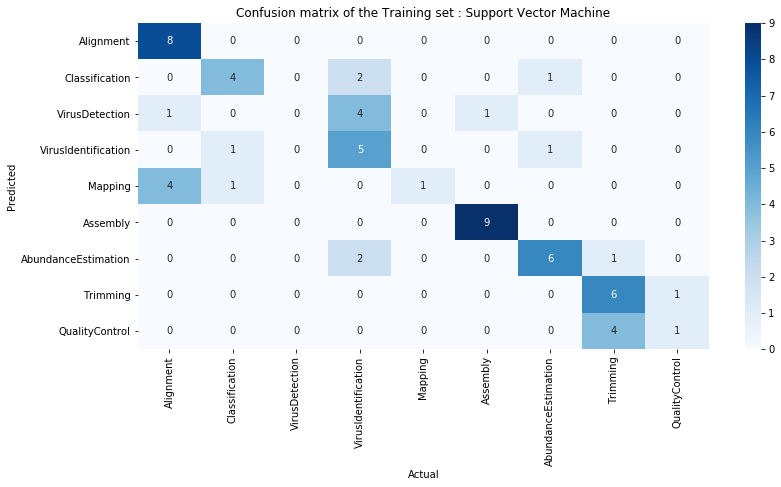

Accuracy on test set: 0.33 (+/- 0.13)


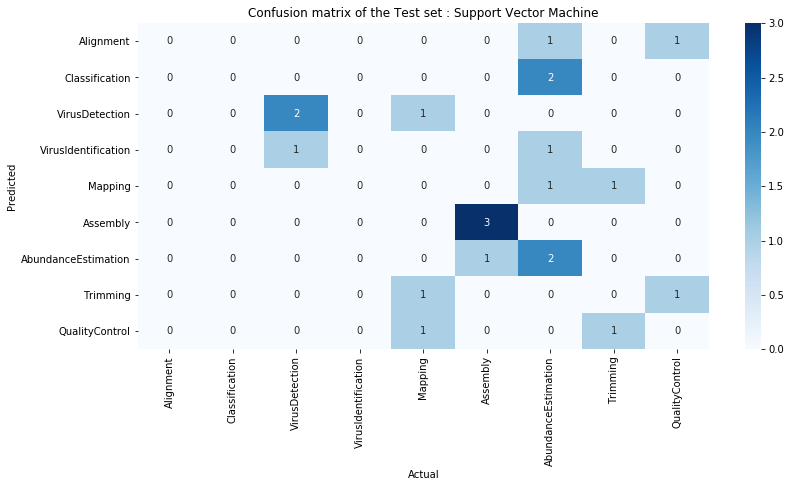

Accuracy on wole data set: 0.55 (+/- 0.08)


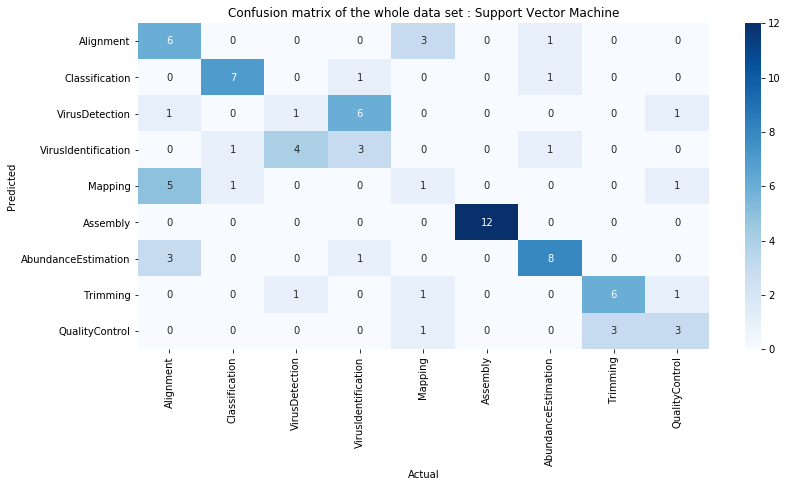

In [11]:
# Stratified cross validation

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

labels = df['Category_Code']



# stratified 4 fold crosss validation

skf = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)
skf.get_n_splits(features)
for train_index, test_index in skf.split(features, labels):

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    svc_fit = best_svc.fit(X_train, y_train)
    svc_pred = best_svc.predict(X_test)
    #confidence interval training set
    scores = cross_val_score(svc_fit, X_train, y_train, cv=3, scoring='accuracy')
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

     #confidence interval test set
    scores = cross_val_score(svc_fit, X_test, y_test, cv=3, scoring='accuracy')
    print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



# Training set performance
#confidence interval 
scores = cross_val_score(svc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy on training set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(svc_fit, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Training set : Support Vector Machine')
plt.show()




# Test set performance
#confidence interval 
scores = cross_val_score(svc_fit, X_test, y_test, cv=3, scoring='accuracy')
print("Accuracy on test set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(svc_fit, X_test, y_test, cv=3)
conf_mat = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Test set : Support Vector Machine')
plt.show()


# whole data set performance
#confidence interval 
scores = cross_val_score(svc_fit, features, labels, cv=3, scoring='accuracy')
print("Accuracy on wole data set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(svc_fit, features, labels, cv=3)
conf_mat = confusion_matrix(labels, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the whole data set : Support Vector Machine')
plt.show()






In [12]:
# checking if the hyperparameter tuning process has returned a better model
# base model
base_model = svm.SVC(random_state = 8)
scores_base = cross_val_score(base_model, X_train, y_train, cv=3, scoring='accuracy')
print("base model accuracy: %0.2f (+/- %0.2f)" % (scores_base.mean(), scores_base.std() * 2))
# tuned model
scores_tuned = cross_val_score(svc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("tuned model accuracy: %0.2f (+/- %0.2f)" % (scores_tuned.mean(), scores_tuned.std() * 2))


base model accuracy: 0.55 (+/- 0.10)
tuned model accuracy: 0.63 (+/- 0.06)
